# Sensor Model

## Load Dependencies

In [280]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
import IPython.display as ipd
from environment import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Maze 1

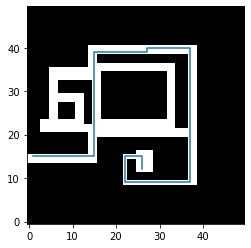

In [284]:
## Step 1: Create the world and devise robot motion
# Load in a particular environment
env = Environment("Maze1.png")
# Devise a path through that environment that passes through 3 locations
X = env.simulate_trajectory([[0, 15], [27, 40], [26, 12]])
# Plot the environment with the path superimposed
plt.figure()
env.plot()
plt.plot(X[:, 0], X[:, 1])
 
## Step 2: Simulate scans at each position
# How many angles to sample in the range scanner
res = 50
# The noise of the scanner (start with low noise to make the problem easier)
alpha = 0.1
# Make this repeatably pseudorandom by seeding so that the numbers you get match up with mine
np.random.seed(0) 
# Create a list of scans.  Each scan holds a list of "res" laser ranges across all angles
observed_scans = []
for i in range(X.shape[0]):
    observed_scans.append(env.get_range_scan(X[i, :], res, alpha))
# NOTE: observed_scans[i][j] would be angle j at time i

## Load Maze 2

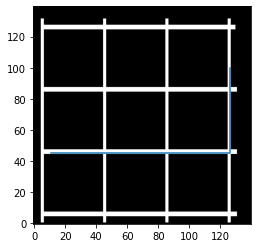

In [281]:
env = Environment("Maze2.png")
res = 50
X = env.simulate_trajectory([[10, 45], [120, 45], [126, 100]])
plt.figure()
env.plot()
plt.plot(X[:, 0], X[:, 1])

alpha = 4
np.random.seed(0)
observed_scans = []
for i in range(X.shape[0]):
    observed_scans.append(env.get_range_scan(X[i, :], res, alpha))

## Load Maze 3

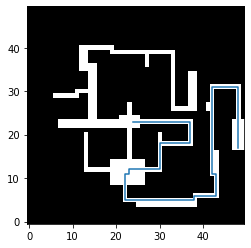

In [294]:
env = Environment("Maze3.png")
res = 50
X = env.simulate_trajectory([[23,23], [37, 20], [23, 11], [42,15], [48,17]])
plt.figure()
env.plot()
plt.plot(X[:, 0], X[:, 1])

alpha = 4
np.random.seed(0)
observed_scans = []
for i in range(X.shape[0]):
    observed_scans.append(env.get_range_scan(X[i, :], res, alpha))

## Load Perfect State Scans

In [285]:
state_scans = env.get_state_scans(res)

## Get Measurement Probabilities

In [291]:
def get_measurement_prob(exp, obs, alpha, gamma=0.1):
    """
    exp: ndarray(N)
        Ground truth scan
    obs: ndarray(N)
        Measured scan
    alpha: float
        Disparity
    """
    prod = alpha*exp + gamma
    res = -np.sum(np.log(np.sqrt(2*np.pi)*prod)) 
    res -= np.sum((exp-obs)**2 / (2*(prod**2)))
    return np.exp(res)

## Test Measurement Probabilities

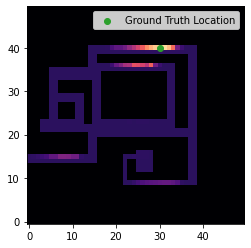

In [293]:
K = len(state_scans)
# Compute the measurement probability of the scan at each location
meas_probs = np.zeros(K)
idx = 54
for i in range(K):
    meas_probs[i] = get_measurement_prob(observed_scans[idx], state_scans[i], alpha)
# Plot the measurement probabilities on the map
env.plot_probabilities(meas_probs, p=1e-2, show_max=False)
# Plot the ground truth location from the trajectory as an green dot
plt.scatter([X[idx, 0]], X[idx, 1], c='C2') 
plt.legend(["Ground Truth Location"])